In [72]:
#import statements
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# Load data
data = pd.read_csv('NVDA.csv')
data

,Date,Open,High,Low,Close,Volume
0,04/18/2024,849.70,861.90,824.02,846.71,"44,726,031"
1,04/17/2024,883.40,887.75,839.50,840.35,"49,539,953"
2,04/16/2024,864.33,881.18,860.64,874.15,"37,045,301"
3,04/15/2024,890.98,906.13,859.29,860.01,"44,307,699"
4,04/12/2024,896.99,901.75,875.30,881.86,"42,680,480"
5,04/11/2024,874.20,907.39,869.26,906.16,"43,163,727"
6,04/10/2024,839.26,874.00,837.09,870.39,"43,192,848"
7,04/09/2024,874.42,876.35,830.22,853.54,"50,354,738"
8,04/08/2024,887.00,888.30,867.32,871.33,"28,322,000"
9,04/05/2024,868.66,884.81,859.26,880.08,"39,967,848"


In [74]:

# Preprocess data
# ... (e.g., convert to datetime, handle missing values)
data['Date'] = pd.to_datetime(data['Date'])
data['Volume'] = data['Volume'].str.replace(',', '').astype(float)

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 1:])  # Exclude the datetime column

# Split data into features and target
X = scaled_data[:, :-1]  # Features
y = scaled_data[:, -1]   # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
#X_train
#X_test
#y_train
#y_test

In [76]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

#Evaluate the model
loss = model.evaluate(X_test, y_test)

# predictions
predictions = model.predict(X_test)


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step - loss: 0.1829 - val_loss: 0.1906
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1750 - val_loss: 0.1800
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1840 - val_loss: 0.1698
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1499 - val_loss: 0.1599
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1653 - val_loss: 0.1505
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1257 - val_loss: 0.1414
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1230 - val_loss: 0.1327
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1082 - val_loss: 0.1245
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0998 - val_loss: 0.1166
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0946 - val_loss: 0.1091
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0895 - val_loss: 0.1021
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0821 - val_loss: 0.0956


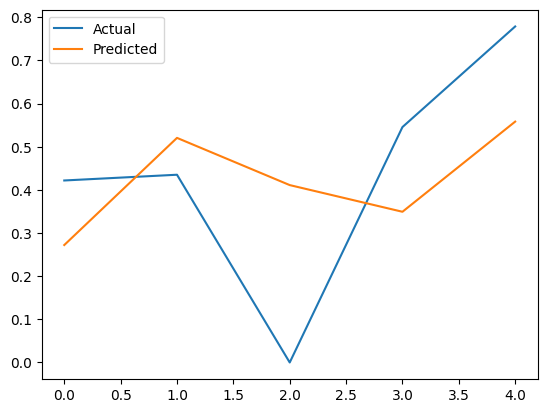

In [77]:

plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()
